In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics,cross_validation,preprocessing
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier

In [49]:
df=pd.read_csv('C://Users//Sudipta//Desktop//ML//acadgild//pycodes//loan credit//cs-training.csv',',')

In [50]:
df.count()

Unnamed: 0                              150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64

In [51]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [52]:
def print_null_freq(df):
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable,null_variables)
    

In [53]:
print_null_freq(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
RevolvingUtilizationOfUnsecuredLines,150000,0


In [54]:
df.NumberOfDependents.value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [55]:
df['NumberOfDependents']= df['NumberOfDependents'].fillna(0)

In [56]:
print_null_freq(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,150000,0
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
RevolvingUtilizationOfUnsecuredLines,150000,0


## Debt Ratio


In [57]:
df['DebtRatio'].value_counts()

0.000000     4113
1.000000      229
4.000000      174
2.000000      170
3.000000      162
5.000000      143
9.000000      125
10.000000     117
7.000000      115
13.000000     114
6.000000      112
11.000000     108
8.000000      106
12.000000     102
14.000000     101
21.000000      99
15.000000      98
19.000000      91
16.000000      86
18.000000      83
20.000000      83
28.000000      80
24.000000      79
30.000000      78
25.000000      78
22.000000      78
29.000000      77
27.000000      76
23.000000      70
26.000000      69
             ... 
0.474797        1
0.508349        1
0.210872        1
0.074325        1
0.294245        1
0.230446        1
0.435326        1
0.607805        1
0.339040        1
0.558307        1
0.384478        1
1.366861        1
0.275018        1
0.909718        1
0.278574        1
0.610896        1
0.271490        1
0.336025        1
0.378557        1
0.123922        1
0.275182        1
0.174031        1
0.359255        1
0.640236        1
0.566348  

In [58]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [59]:
len(df[df['DebtRatio'] > 100])

24380

In [60]:
df[df['DebtRatio'] > 100]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.305682,57,0,5710.00000,NaN,8,0,3,0,0.0
14,15,0,0.019657,76,0,477.00000,0.0,6,0,1,0,0.0
16,17,0,0.061086,78,0,2058.00000,NaN,10,0,2,0,0.0
32,33,0,0.083418,62,0,977.00000,NaN,6,0,1,0,0.0
44,45,0,0.368876,68,0,1687.50000,1.0,31,0,1,0,0.0
50,51,0,0.818978,73,0,3095.00000,0.0,9,0,1,1,0.0
58,59,0,0.541109,43,0,2477.00000,NaN,3,0,1,0,2.0
62,63,0,0.101156,72,0,1720.00000,NaN,12,0,2,0,0.0
71,72,0,0.142013,67,0,1824.00000,NaN,7,0,2,0,0.0
73,74,0,0.059669,31,0,3162.00000,0.0,11,0,2,0,1.0


In [61]:
## New feature - IsDebtRation > 100

In [62]:
df['HighDebtRatio'] = np.where(df['DebtRatio'] > 100, 'yes', 'no')

In [63]:
df['LowDebtRatio'] = np.where(df['DebtRatio'] < 1, 'yes', 'no')

In [64]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'HighDebtRatio', 'LowDebtRatio'],
      dtype='object')

In [65]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['HighDebtRatio'])
list(le.classes_)
df['HighDebtRatio']=le.transform(df['HighDebtRatio'])

In [66]:
le = preprocessing.LabelEncoder()
le.fit(df['LowDebtRatio'])
list(le.classes_)
df['LowDebtRatio']=le.transform(df['LowDebtRatio'])

In [67]:
df['LowDebtRatio'].value_counts()

1    114634
0     35366
Name: LowDebtRatio, dtype: int64

In [68]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,HighDebtRatio,LowDebtRatio
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,1
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,1
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,1
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,1
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,1


In [69]:
% matplotlib inline

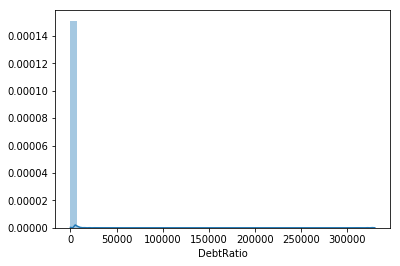

In [70]:
sns.distplot(df['DebtRatio'])

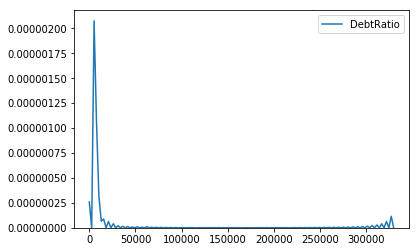

In [71]:
sns.kdeplot(df['DebtRatio'])

C:\Users\Sudipta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


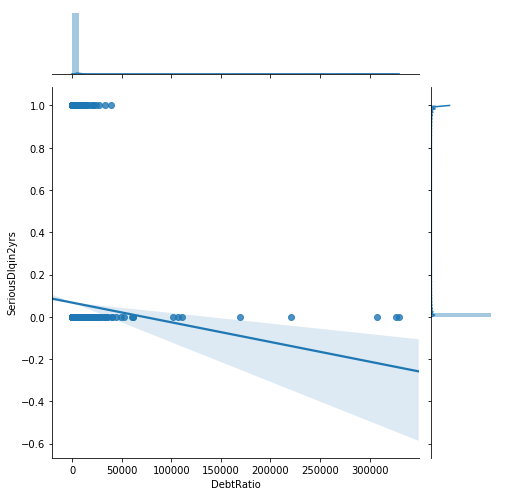

In [72]:
## It does not make sense in classification
sns.jointplot(x="DebtRatio", y="SeriousDlqin2yrs", data=df, kind = 'reg', size = 7)
plt.show()

In [73]:
df.corr()['SeriousDlqin2yrs'].sort_values()

age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.019746
HighDebtRatio                          -0.015886
DebtRatio                              -0.007602
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001802
Unnamed: 0                              0.002801
LowDebtRatio                            0.004393
NumberOfDependents                      0.046869
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfTimes90DaysLate                 0.117175
NumberOfTime30-59DaysPastDueNotWorse    0.125587
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

## RevolvingUtilizationOfUnsecuredLines


In [74]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [75]:
df[df['RevolvingUtilizationOfUnsecuredLines'] > 1000]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,HighDebtRatio,LowDebtRatio
293,294,0,2340.0,45,0,0.339333,8333.0,7,0,2,0,2.0,0,1
697,698,1,2066.0,58,0,0.271121,6000.0,8,1,1,0,1.0,0,1
1991,1992,1,1143.0,44,2,0.547762,6500.0,13,0,4,0,2.0,0,1
2331,2332,0,6324.0,59,0,0.136673,11318.0,4,0,1,0,1.0,0,1
4278,4279,0,1982.0,33,0,0.144982,8000.0,4,0,0,0,0.0,0,1
4793,4794,0,3746.0,52,2,0.481353,2600.0,5,0,1,0,3.0,0,1
6850,6851,0,8497.0,28,0,0.404930,5800.0,5,0,1,0,0.0,0,1
7637,7638,1,1577.0,37,0,0.479826,5526.0,11,0,2,0,2.0,0,1
7774,7775,0,1028.0,27,0,442.000000,NaN,2,0,0,0,0.0,1,0
8199,8200,0,9340.0,62,0,0.186908,8233.0,2,0,1,0,3.0,0,1


## NumberOfTime30-59DaysPastDueNotWorse

In [76]:
df['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [77]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [78]:
bins = [-1, 0, 1, 5, 13,100]
labels = [1,2,3,4,5]
df['binned'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins, labels=labels)


In [79]:
df.rename(columns={"binned": "30-59DaysPastDue-bins"},inplace = True)

In [80]:
df['30-59DaysPastDue-bins'].value_counts()

1    126018
2     16033
3      7441
5       269
4       239
Name: 30-59DaysPastDue-bins, dtype: int64

In [81]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'HighDebtRatio', 'LowDebtRatio',
       '30-59DaysPastDue-bins'],
      dtype='object')

In [82]:
df.corr()['SeriousDlqin2yrs'].sort_values()

age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.019746
HighDebtRatio                          -0.015886
DebtRatio                              -0.007602
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001802
Unnamed: 0                              0.002801
LowDebtRatio                            0.004393
NumberOfDependents                      0.046869
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfTimes90DaysLate                 0.117175
NumberOfTime30-59DaysPastDueNotWorse    0.125587
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

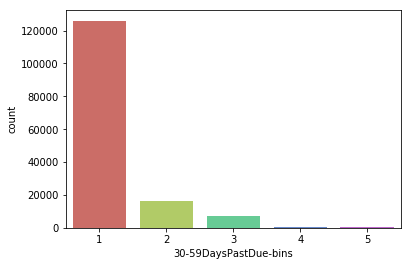

In [83]:
sns.countplot(x = '30-59DaysPastDue-bins', data = df, palette = 'hls')

## age

In [84]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

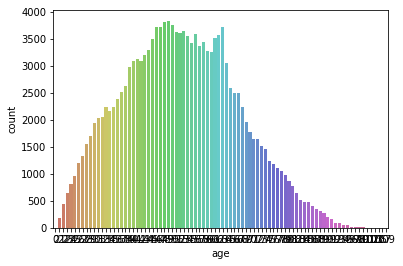

In [85]:
sns.countplot(x = 'age', data = df, palette = 'hls')

In [86]:
df['age'].value_counts().sort_index()

0         1
21      183
22      434
23      641
24      816
25      953
26     1193
27     1338
28     1560
29     1702
30     1937
31     2038
32     2050
33     2239
34     2155
35     2246
36     2379
37     2521
38     2631
39     2987
40     3093
41     3122
42     3082
43     3208
44     3294
45     3502
46     3714
47     3719
48     3806
49     3837
       ... 
76     1183
77     1099
78     1054
79      981
80      876
81      774
82      647
83      512
84      480
85      483
86      407
87      357
88      313
89      276
90      198
91      154
92       93
93       87
94       47
95       45
96       18
97       17
98        6
99        9
101       3
102       3
103       3
105       1
107       1
109       2
Name: age, Length: 86, dtype: int64

In [87]:
df.corr()['SeriousDlqin2yrs'].sort_values()

age                                    -0.115386
NumberOfOpenCreditLinesAndLoans        -0.029669
MonthlyIncome                          -0.019746
HighDebtRatio                          -0.015886
DebtRatio                              -0.007602
NumberRealEstateLoansOrLines           -0.007038
RevolvingUtilizationOfUnsecuredLines   -0.001802
Unnamed: 0                              0.002801
LowDebtRatio                            0.004393
NumberOfDependents                      0.046869
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfTimes90DaysLate                 0.117175
NumberOfTime30-59DaysPastDueNotWorse    0.125587
SeriousDlqin2yrs                        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [88]:
df[df['age'] == 0 ]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,HighDebtRatio,LowDebtRatio,30-59DaysPastDue-bins
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,0,1,2


In [89]:
df = df.drop(df[df['age'] < 1].index)

In [90]:
df[df['age'] == 0 ]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,HighDebtRatio,LowDebtRatio,30-59DaysPastDue-bins


## MonthlyIncome


In [91]:
df['MonthlyIncome'].describe()


count    1.202680e+05
mean     6.670227e+03
std      1.438473e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [92]:
df['MonthlyIncome'].value_counts().sort_index()

0.0          1634
1.0           605
2.0             6
4.0             2
5.0             2
7.0             1
9.0             1
10.0            2
11.0            1
15.0            1
21.0            1
25.0            1
27.0            2
34.0            1
40.0            3
42.0            1
50.0            4
55.0            1
56.0            1
69.0            1
70.0            2
72.0            1
75.0            1
83.0            1
84.0            1
100.0          24
101.0           1
105.0           1
107.0           1
115.0           1
             ... 
173000.0        1
184903.0        1
203500.0        1
208333.0        1
218674.0        1
234600.0        1
235000.0        1
237400.0        1
237490.0        1
250000.0        2
251608.0        1
261666.0        1
287662.0        1
304000.0        1
324000.0        1
408333.0        1
428250.0        1
440000.0        1
562466.0        1
582369.0        1
629000.0        1
649587.0        1
699530.0        1
702500.0        1
730483.0  

In [93]:
#sns.countplot(x = 'MonthlyIncome', data = df, palette = 'hls')

In [95]:
bins = [-1, 0, 1000, 5000, 10000,50000,100000,1000000,10000000]
labels = [1,2,3,4,5,6,7,8]
df['binned'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

In [96]:
df.rename(columns={"binned": "MonthlyIncome-bins"},inplace = True)

In [98]:
df['MonthlyIncome-bins'].value_counts().sort_index()

1     1634
2     3161
3    51064
4    46090
5    18018
6      231
7       66
8        4
Name: MonthlyIncome-bins, dtype: int64

## NumberOfDependents

In [99]:
df['NumberOfDependents'].describe()


count    149999.000000
mean          0.737405
std           1.107020
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [100]:
df['NumberOfDependents'].value_counts().sort_index()

0.0     90826
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

## NumberOfOpenCreditLinesAndLoans


In [105]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    149999.000000
mean          8.452776
std           5.145964
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [102]:
df['NumberOfOpenCreditLinesAndLoans'].value_counts().sort_index()


0      1888
1      4438
2      6666
3      9058
4     11609
5     12931
6     13613
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

## NumberOfTimes90DaysLate


In [106]:
df['NumberOfTimes90DaysLate'].describe()


count    149999.000000
mean          0.265975
std           4.169318
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [107]:
df['NumberOfTimes90DaysLate'].value_counts().sort_index()

0     141661
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [108]:
bins = [-1, 10, 20, 100]
labels = [1,2,3]
df['NumberOfTimes90DaysLate-bin'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=bins, labels=labels)

In [110]:
df['NumberOfTimes90DaysLate-bin'].value_counts().sort_index()

1    149714
2        16
3       269
Name: NumberOfTimes90DaysLate-bin, dtype: int64

## NumberRealEstateLoansOrLines

In [111]:
df['NumberRealEstateLoansOrLines'].describe()


count    149999.000000
mean          1.018233
std           1.129772
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [112]:
df['NumberRealEstateLoansOrLines'].value_counts().sort_index()

0     56188
1     52338
2     31521
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [114]:
bins = [-1, 0, 10, 15, 100]
labels = [1,2,3,4]
df['NumberRealEstateLoansOrLines-bin'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins=bins, labels=labels)

In [115]:
df['NumberRealEstateLoansOrLines-bin'].value_counts().sort_index()

1    56188
2    93717
3       70
4       24
Name: NumberRealEstateLoansOrLines-bin, dtype: int64

## NumberOfTime60-89DaysPastDueNotWorse


In [116]:
df['NumberOfTime60-89DaysPastDueNotWorse'].describe()


count    149999.000000
mean          0.240388
std           4.155193
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [117]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()


0     142395
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [118]:
bins = [-1, 0, 1, 5, 100]
labels = [1,2,3,4]
df['NumberOfTime60-89DaysPastDueNotWorse-bin'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels)

In [119]:
df['NumberOfTime60-89DaysPastDueNotWorse-bin'].value_counts().sort_index()

1    142395
2      5731
3      1575
4       298
Name: NumberOfTime60-89DaysPastDueNotWorse-bin, dtype: int64

In [120]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'HighDebtRatio', 'LowDebtRatio',
       '30-59DaysPastDue-bins', 'MonthlyIncome-bins',
       'NumberOfTimes90DaysLate-bin', 'NumberRealEstateLoansOrLines-bin',
       'NumberOfTime60-89DaysPastDueNotWorse-bin'],
      dtype='object')

In [121]:
df.drop('Unnamed: 0',axis =1 , inplace = True)

In [123]:
missingPercent(df')

MonthlyIncome 0.198207988053
MonthlyIncome-bins 0.198207988053


In [124]:
df.dropna(inplace=True)

In [125]:
missingPercent(df)

No missing values


In [130]:
X_train, X_test, Y_train, Y_test = splitTrainTest(df,'SeriousDlqin2yrs')

(96214, 17)
(24054, 17)
(96214,)
(24054,)


In [136]:
dt = decisionTreeWithGridSearch(X_train,Y_train)

Top Param: [mean: 0.93284, std: 0.00173, params: {'min_samples_split': 10, 'max_depth': 2, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93284, std: 0.00173, params: {'min_samples_split': 20, 'max_depth': 2, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93320, std: 0.00189, params: {'min_samples_split': 10, 'max_depth': 5, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93320, std: 0.00189, params: {'min_samples_split': 20, 'max_depth': 5, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93272, std: 0.00142, params: {'min_samples_split': 10, 'max_depth': 7, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93275, std: 0.00139, params: {'min_samples_split': 20, 'max_depth': 7, 'min_samples_leaf': 10, 'criterion': 'gini'}, mean: 0.93284, std: 0.00173, params: {'min_samples_split': 10, 'max_depth': 2, 'min_samples_leaf': 10, 'criterion': 'entropy'}, mean: 0.93284, std: 0.00173, params: {'min_samples_split': 20, 'max_depth': 2, 'min_samples_leaf': 10, 'criter

In [138]:
featureRaningUsingDecisionTree(X_train,dt)

                                     feature  rank
6                    NumberOfTimes90DaysLate  0.51
0       RevolvingUtilizationOfUnsecuredLines  0.26
12                     30-59DaysPastDue-bins  0.13
8       NumberOfTime60-89DaysPastDueNotWorse  0.06
3                                  DebtRatio  0.01
2       NumberOfTime30-59DaysPastDueNotWorse  0.01
16  NumberOfTime60-89DaysPastDueNotWorse-bin  0.01
4                              MonthlyIncome  0.00
5            NumberOfOpenCreditLinesAndLoans  0.00
7               NumberRealEstateLoansOrLines  0.00
1                                        age  0.00
9                         NumberOfDependents  0.00
10                             HighDebtRatio  0.00
11                              LowDebtRatio  0.00
13                        MonthlyIncome-bins  0.00
14               NumberOfTimes90DaysLate-bin  0.00
15          NumberRealEstateLoansOrLines-bin  0.00


C:\Users\Sudipta\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [139]:
lr = runLogisticRegression(X_train,Y_train)

Training Score:  0.931808260752
Test Score:  0.930863889582
Intercept:  [-0.23746953]
Model coef:  [[ -5.81549007e-05  -3.42877680e-02   7.03393852e-02  -5.37260198e-04
    1.62691599e-06  -1.06569255e-03   2.83925821e-01   1.91540668e-01
   -3.63724185e-01   8.17725135e-02  -4.27660973e-02  -2.29499697e-01
    7.30968824e-01  -4.54795293e-01  -2.64131317e-01  -3.32477164e-01
    5.60556064e-01]]


In [141]:
train_report(lr,X_train,Y_train)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     89529
          1       0.62      0.05      0.09      6685

avg / total       0.91      0.93      0.90     96214



In [142]:
test_report(lr,X_test,Y_test)

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     22382
          1       0.54      0.04      0.07      1672

avg / total       0.91      0.93      0.90     24054



In [137]:
def splitTrainTest(df,targetVariable):
    x = df.drop(targetVariable, axis = 1)
    y = df[targetVariable]
    X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    return X_train, X_test, Y_train, Y_test

def missingPercent(df):
    missing=False
    for var in df.columns:
        if df[var].isnull().sum()>0:
            print(var, df[var].isnull().mean())
            missing=True
    
    for var in df.columns:
        if df[var].isnull().mean()>0.80:
            print(var, df[var].unique())
       
    if missing==False:
            print('No missing values')

def GridSearch_BestParam(X, y, model, param_grid,cv=10):
    grid_search = GridSearchCV(model,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

def decisionTreeWithGridSearch(X_train,Y_train):
    dt = DecisionTreeClassifier() 
    param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20],
             "max_depth": [2,5,7],
             "min_samples_leaf":[10]}
    top_para = GridSearch_BestParam(X_train,Y_train, dt, param_grid, cv=10)
    print("Top Param:", top_para)
    top_score = sorted(top_para,key=itemgetter(1), reverse=True)
    print("Top Score:", top_score)
    paramCV = top_score[0].parameters
    best_dt = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
    best_dt.fit(X_train,Y_train)
    print('Training Score: ',best_dt.score(X_train,Y_train))
    print('Test Score: ', best_dt.score(X_test,Y_test))
    best_dt.feature_importances_
    return best_dt 

def featureRaningUsingDecisionTree(X_train,model):
    temp = pd.DataFrame()
    temp['feature'] = pd.Series(X_train.columns)
    temp['rank'] = np.round(model.feature_importances_,2)
    print(temp.sort_index(by='rank',ascending=False))
    
def runLogisticRegression(X_train,Y_train):
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    print('Training Score: ',lr.score(X_train,Y_train))
    print('Test Score: ', lr.score(X_test,Y_test))
    print('Intercept: ',lr.intercept_)
    print('Model coef: ',lr.coef_)
    return lr

def train_report(model,X_train,Y_train):
    from sklearn.metrics import classification_report,confusion_matrix
    pred_quality = model.predict(X_train)
    confusion_matrix(Y_train,pred_quality)
    print(classification_report(Y_train,pred_quality))
    
def test_report(model,X_test,Y_test):
    from sklearn.metrics import classification_report,confusion_matrix
    pred_quality = model.predict(X_test)
    confusion_matrix(Y_test,pred_quality)
    print(classification_report(Y_test,pred_quality))